In [1]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


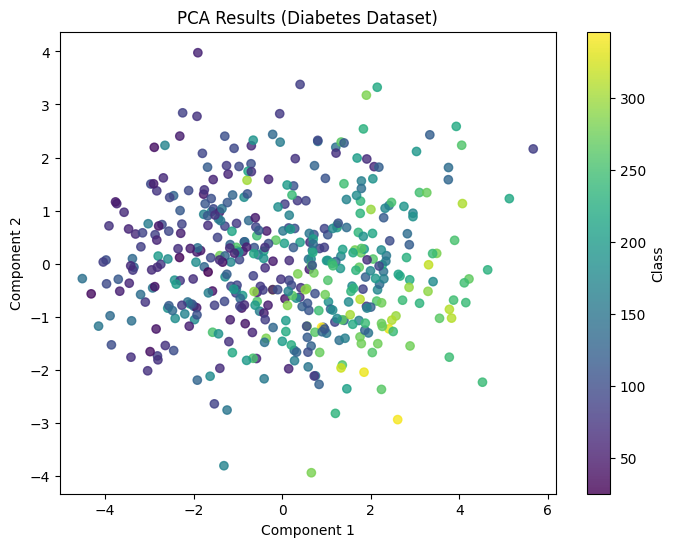

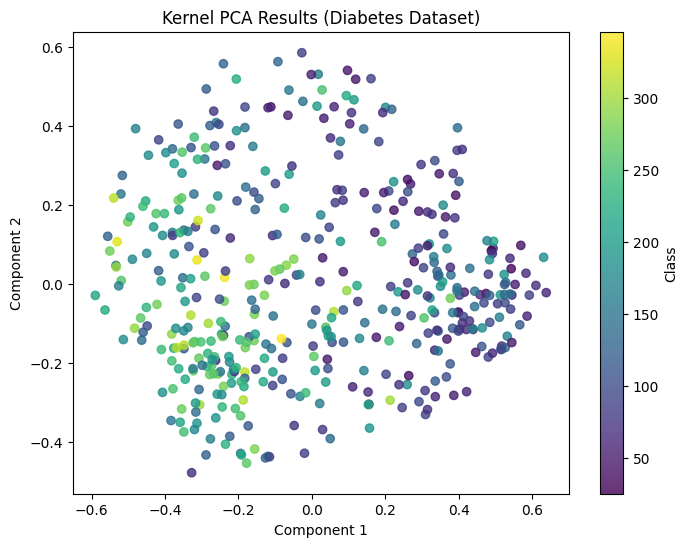

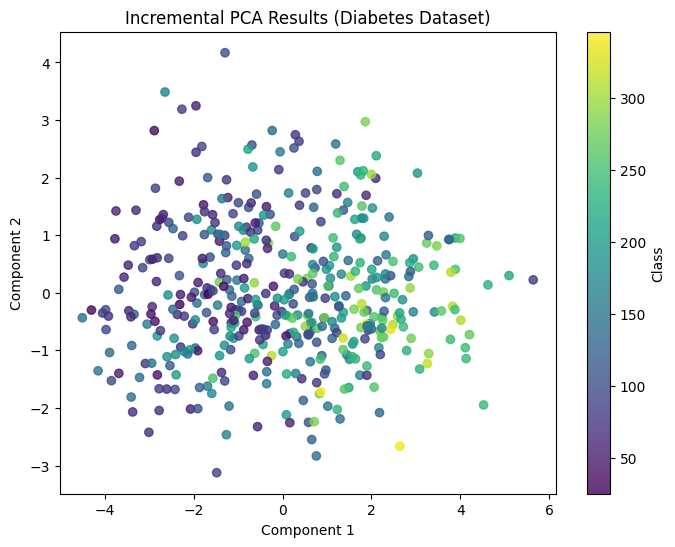

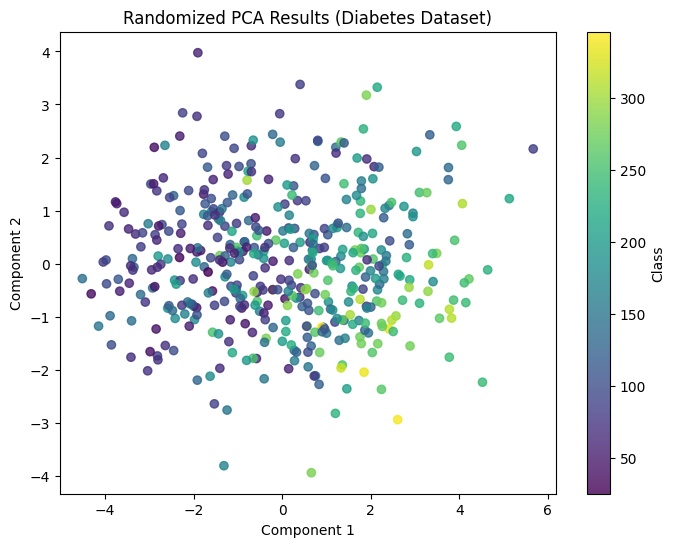

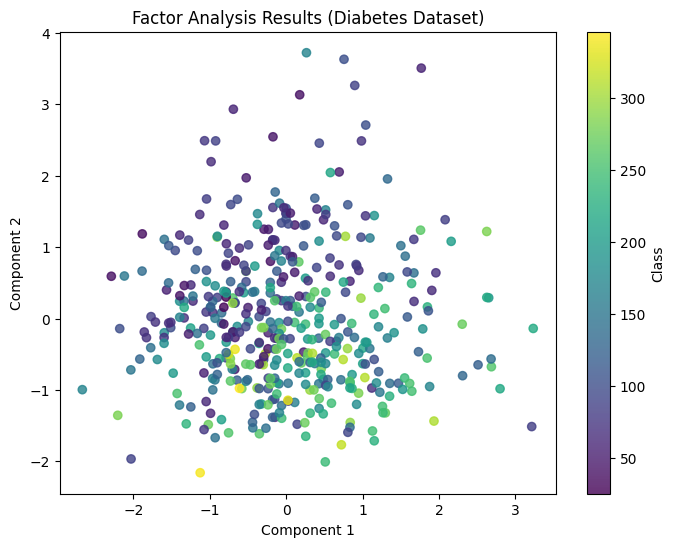

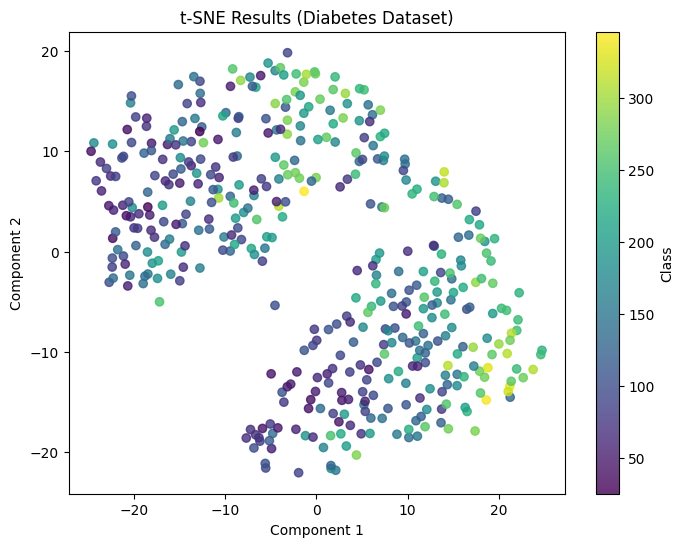

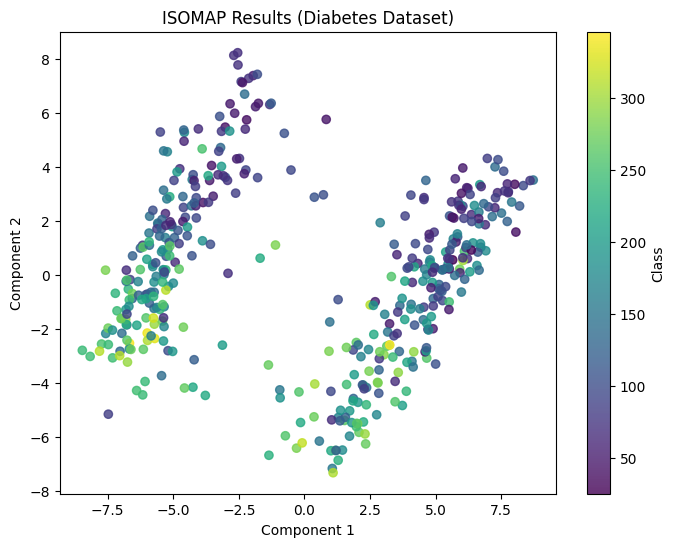

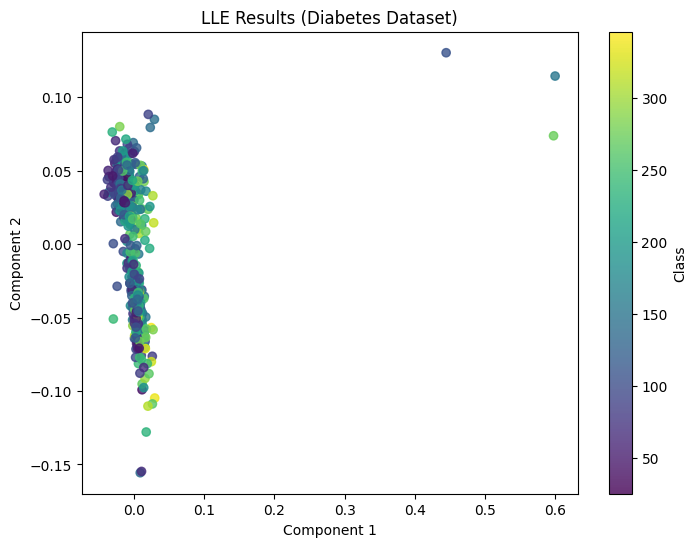

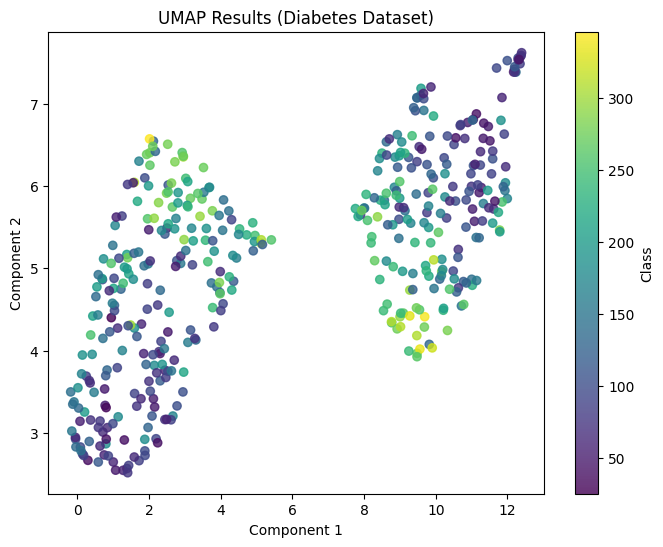

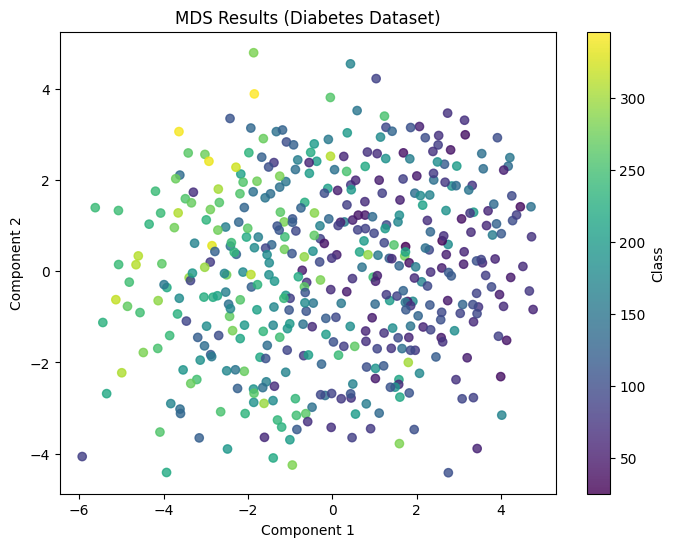

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


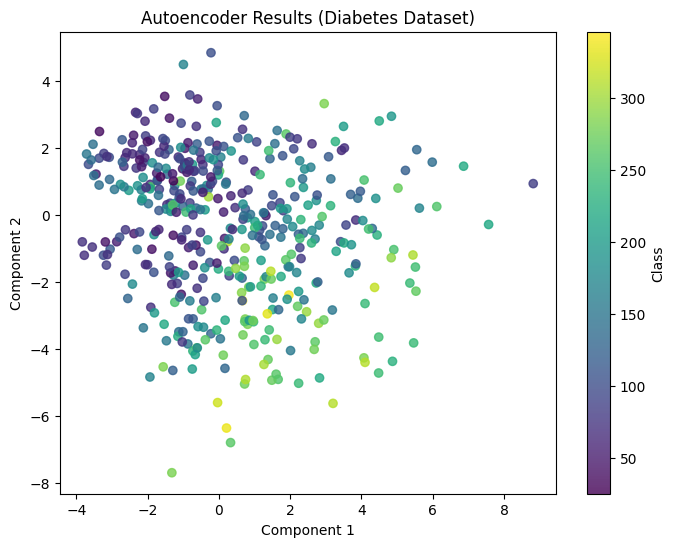

In [2]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA, FactorAnalysis
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS
from sklearn.decomposition import TruncatedSVD
from umap import UMAP
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

# Function to visualize results
def plot_results(X, y, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", alpha=0.8)
    plt.colorbar(scatter, label="Class")
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

# Step 2: Load and Standardize the Diabetes Dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Dimensionality Reduction Techniques
results = {}

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
results["PCA"] = X_pca

# Kernel PCA
kpca = KernelPCA(n_components=2, kernel="rbf")
X_kpca = kpca.fit_transform(X_scaled)
results["Kernel PCA"] = X_kpca

# Incremental PCA
ipca = IncrementalPCA(n_components=2)
X_ipca = ipca.fit_transform(X_scaled)
results["Incremental PCA"] = X_ipca

# Randomized PCA (Truncated SVD)
rpca = TruncatedSVD(n_components=2)
X_rpca = rpca.fit_transform(X_scaled)
results["Randomized PCA"] = X_rpca

# Factor Analysis
fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X_scaled)
results["Factor Analysis"] = X_fa

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
results["t-SNE"] = X_tsne

# ISOMAP
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled)
results["ISOMAP"] = X_isomap

# Locally Linear Embedding (LLE)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_lle = lle.fit_transform(X_scaled)
results["LLE"] = X_lle

# UMAP
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X_scaled)
results["UMAP"] = X_umap

# MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)
results["MDS"] = X_mds

# Step 4: Visualize Results
for method, X in results.items():
    plot_results(X, y, f"{method} Results (Diabetes Dataset)")

# Step 5: Autoencoder
input_dim = X_scaled.shape[1]
encoding_dim = 2

# Build Autoencoder Model
input_layer = Input(shape=(input_dim,))
encoder = Dense(128, activation="relu")(input_layer)
encoder = Dense(64, activation="relu")(encoder)
encoder_output = Dense(encoding_dim, activation="linear")(encoder)

decoder = Dense(64, activation="relu")(encoder_output)
decoder = Dense(128, activation="relu")(decoder)
decoder_output = Dense(input_dim, activation="linear")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder_output)
encoder_model = Model(inputs=input_layer, outputs=encoder_output)

# Compile and Train Autoencoder
autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=16, shuffle=True, verbose=0)

# Get Encoded Features
X_autoencoded = encoder_model.predict(X_scaled)

# Visualize Autoencoder Results
plot_results(X_autoencoded, y, "Autoencoder Results (Diabetes Dataset)")